# Automatic Differentiation
Automatic Differentiation (AD) is a powerful computational tool that has revolutionized various fields, particularly in mathematics, physics, engineering, and machine learning. It provides a systematic and efficient way to compute derivatives of complex mathematical functions, allowing us to effortlessly obtain accurate and reliable gradients. This capability of AD brings a multitude of benefits, enabling faster and more robust optimization, enhancing the performance of machine learning models, and facilitating the solution of intricate differential equations.

In this exercise you have to use both manual differentiation and automatic differentiation to find the solution of the following Poisson's equation.

$$-div(q(u)*\Delta(u)) = 0,$$
$$u = 0\text{ at }x=0, u=1\text{ at }x=1$$
$$q(u) = (1+2u+4u^3)$$

In [172]:
from dolfin import *
import numpy

mesh = IntervalMesh(40, 0, 1)
V = FunctionSpace(mesh, 'Lagrange', 1)

left_boundary = CompiledSubDomain("on_boundary && near(x[0],0)")
right_boundary = CompiledSubDomain("on_boundary && near(x[0],1)")

bc_0 = DirichletBC(V, Constant(0.0), left_boundary)
bc_1 = DirichletBC(V, Constant(1.0), right_boundary)
bcs = [bc_0, bc_1]

m = 2


def q(u):
    return (1+u)**m

# Define variational problem
v = TestFunction(V)
du = TrialFunction(V)
u = Function(V)  # most recently computed solution
F = inner(q(u)*nabla_grad(u), nabla_grad(v))*dx

J = derivative(F, u, du)

# Compute solution
problem = NonlinearVariationalProblem(F, u, bcs, J)
solver = NonlinearVariationalSolver(problem)

prm = solver.parameters
prm['newton_solver']['absolute_tolerance'] = 1E-5
prm['newton_solver']['relative_tolerance'] = 1E-5
prm['newton_solver']['maximum_iterations'] = 25

solver.solve()

(4, True)

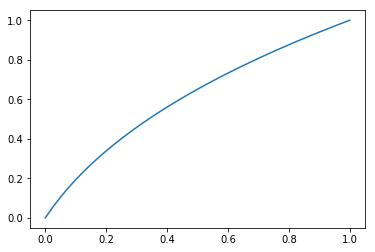

In [173]:
plot(u)